# Visualization of data in databases - Eln Experiment Yield Pridiction
1. Establish a connection with the database and output the data from the
required table in Dataframe format.





In [66]:
! pip install pymysql

import pymysql.cursors
import pandas as pd

host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input()

aichem567.


In [67]:
# database connection
connection = pymysql.connect(
    host=host,
    user=usr,
    password=psword,
    database=db,
    charset="utf8mb4",
    cursorclass=pymysql.cursors.DictCursor,
           )

In [68]:
cursor = connection.cursor()

UserId = 'zzyyliu98'
sql ="SELECT * FROM situation.a1_results;"

    # with connection.cursor() as cursor:
    #   cursor.execute(sql % UserId)

cursor.execute(sql)
        # result for searching Databank
result = cursor.fetchall()
        # change result to dataframe
df_raw = pd.DataFrame(result, columns=[i[0] for i in cursor.description])

print(df_raw)


    ExperimentNumber  Weight  Yield                SampleDesc  QualityTest  \
0                  1     297   78.0   White crystalline solid            1   
1                  2     488   70.0    Solid formation varies            1   
2                  3     315   80.0  Speed of reaction varies            1   
3                  4     120    NaN   Purity by melting point            0   
4                  5     232   70.0      Degree of completion            1   
..               ...     ...    ...                       ...          ...   
56                 3      90   66.0                Compound B            0   
57                 3     130   93.0                Compound C            1   
58                 3     170   94.0                Compound A            1   
59                 3      85   65.0                Compound B            0   
60                 3     125   95.0                Compound C            1   

    Spectrum_ID  ReactionTime  
0           NaN           NaN  

2.Visualize data with various types of charts


---
The experimental data consisted mainly of experiment number 3, so only the effect of the variables in experiment 3 on yield was considered.

Let's first look at which reaction times and weights the experimental samples focused on in the experiment separately.










In [69]:
#Select all results in Experiment 3 and delete the results with no reaction time
df_raw1 = df_raw
df_raw1 = df_raw1[df_raw1['ExperimentNumber'] == 3]
df_raw1 = df_raw1.dropna(subset=['ReactionTime'])

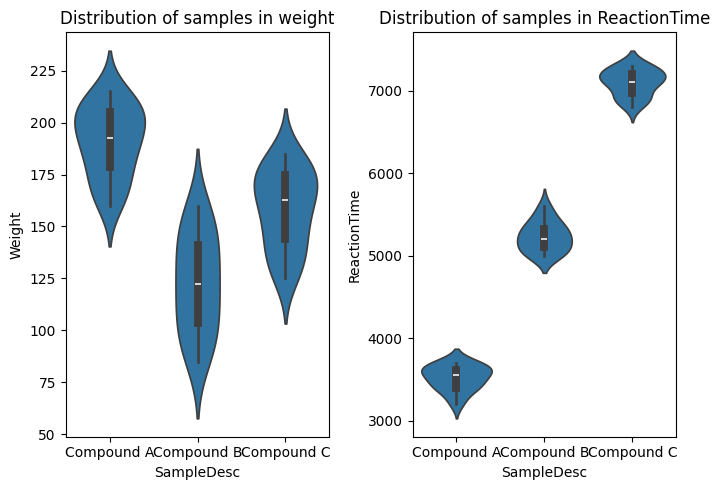

In [70]:
from sklearn.preprocessing import LabelEncoder

df_raw2 = df_raw1
label_encoder = LabelEncoder()
df_raw2['SampleEncoded'] = label_encoder.fit_transform(df_raw1['SampleDesc'])

# create Violin Plot
plt.figure(figsize=(7,5))

# Violin Plot: Weight
plt.subplot(1, 2, 1)
sns.violinplot(x='SampleDesc', y='Weight', data=df_raw2)
plt.title('Distribution of samples in weight')

# Violin Plot: ReactionTime
plt.subplot(1, 2, 2)
sns.violinplot(x='SampleDesc', y='ReactionTime', data=df_raw2)
plt.title('Distribution of samples in ReactionTime')

plt.tight_layout()
plt.show()

*   Relationship between yield and weight

In [71]:

# create new DataFrame
columns_to_extract = ['Weight', 'Yield','SampleDesc','ReactionTime']
df_raw1 = df_raw1[columns_to_extract]
df_raw1 = df_raw1.sort_values(by='Weight')

print(df_raw1)


    Weight  Yield  SampleDesc  ReactionTime
59      85   65.0  Compound B        5000.0
56      90   66.0  Compound B        5300.0
53      95   68.0  Compound B        5200.0
50     100   69.0  Compound B        5100.0
47     105   70.0  Compound B        5000.0
44     110   72.0  Compound B        5300.0
41     115   73.0  Compound B        5200.0
38     120   74.0  Compound B        5100.0
60     125   95.0  Compound C        7200.0
35     125   75.0  Compound B        5000.0
57     130   93.0  Compound C        6900.0
32     130   77.0  Compound B        5400.0
54     135   92.0  Compound C        7100.0
29     135   79.0  Compound B        5300.0
26     140   80.0  Compound B        5100.0
51     140   90.0  Compound C        7300.0
48     145   98.0  Compound C        7200.0
23     145   82.0  Compound B        5200.0
45     150   97.0  Compound C        6900.0
14     150   85.0  Compound B        5400.0
20     155   83.0  Compound B        5600.0
42     155   96.0  Compound C   

Keeping reaction times consistent: controlling the variables

In [72]:
import numpy as np

duplicated_ReactionTime = df_raw1[df_raw1.duplicated(subset=['ReactionTime'], keep=False)]

duplicated_ReactionTime = duplicated_ReactionTime['ReactionTime'].unique()

duplicated_ReactionTime = np.sort(duplicated_ReactionTime
                                  )
print(duplicated_ReactionTime)

[3400. 3500. 3600. 3700. 5000. 5100. 5200. 5300. 5400. 6900. 7100. 7200.
 7300.]


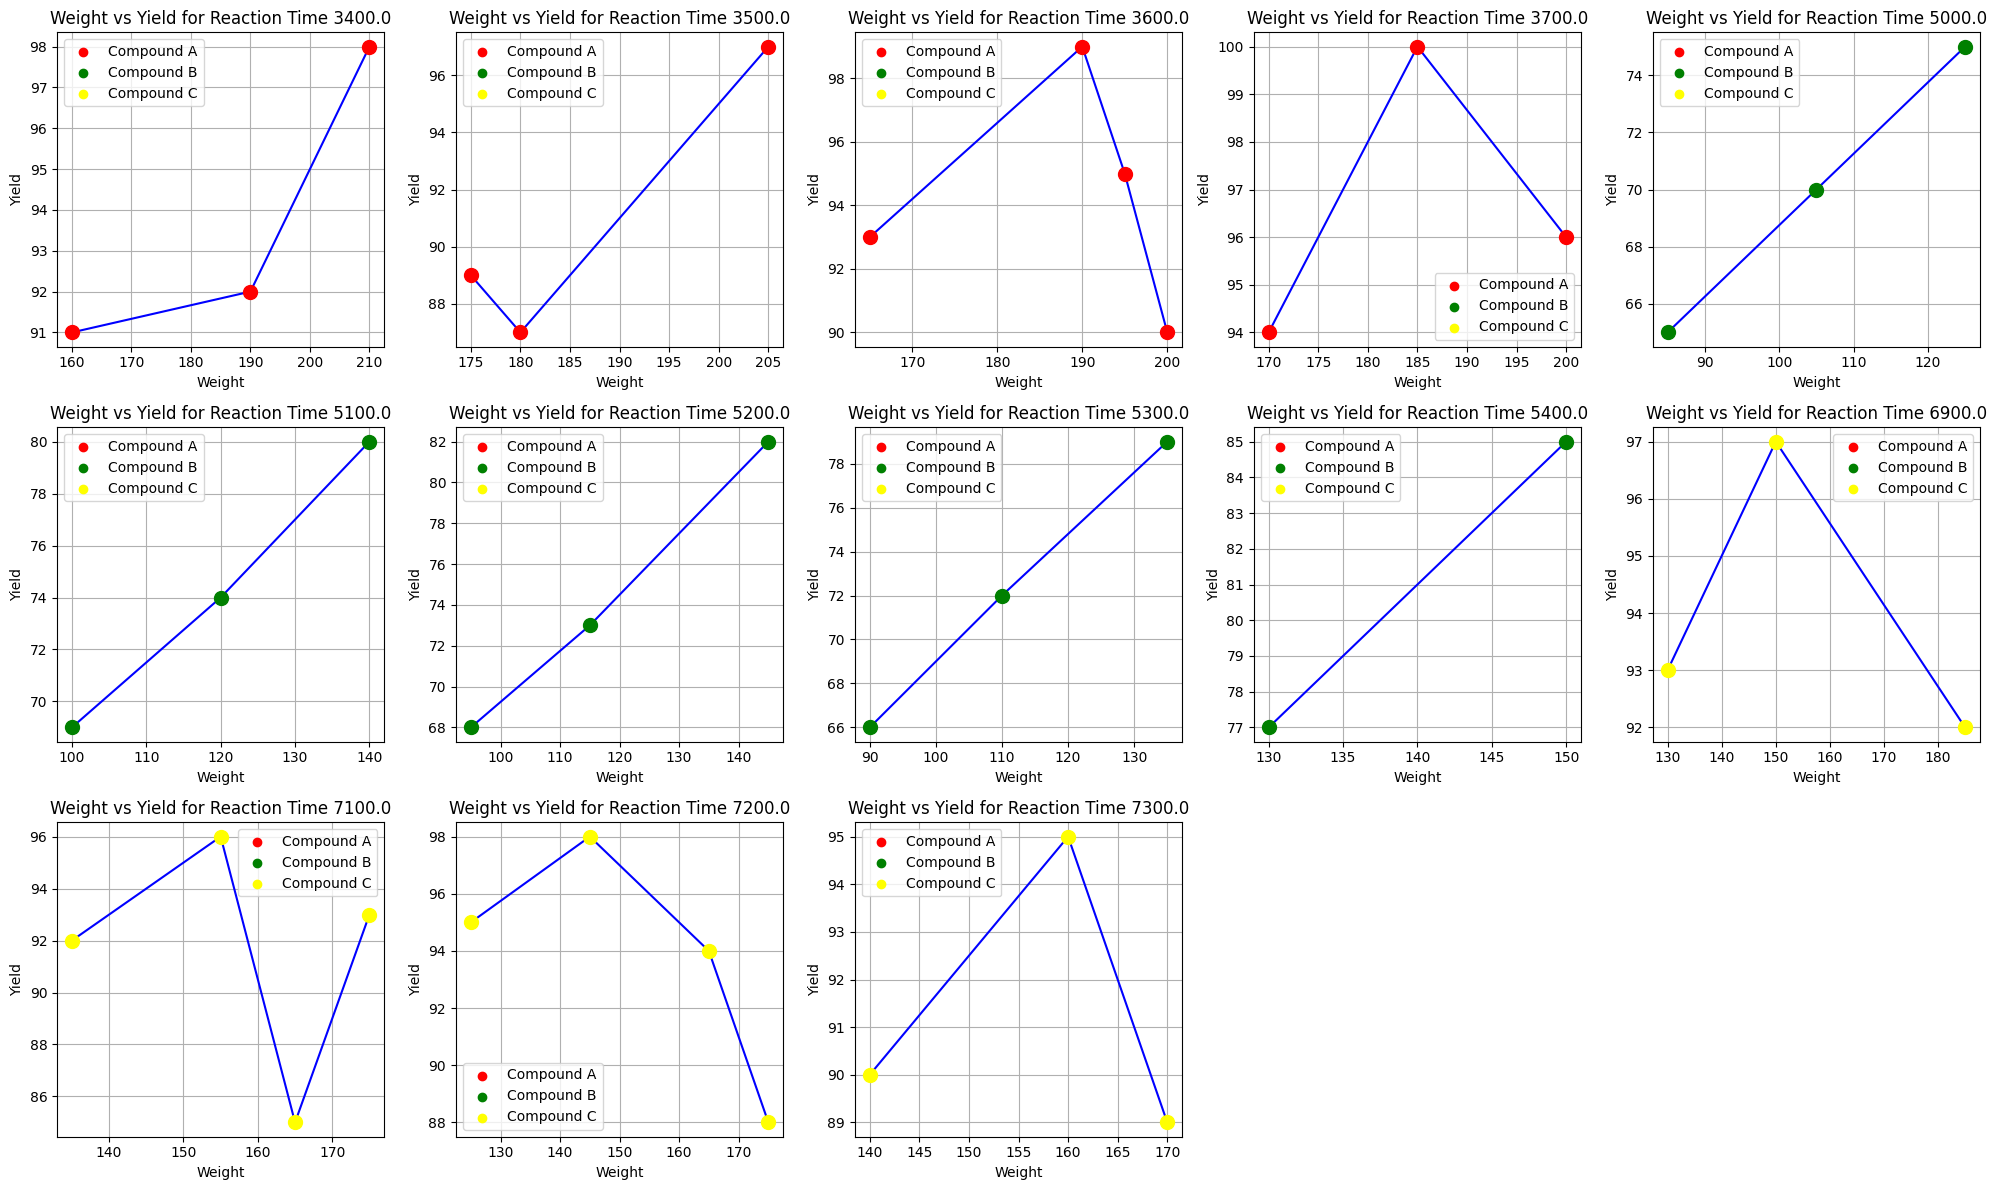

In [73]:
import matplotlib.pyplot as plt


grouped=df_raw1.groupby("ReactionTime")
#reaction_time_3400 = grouped.get_group(3400)

#print(reaction_time_3400)

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

color_map = {'Compound A': 'red', 'Compound B': 'green', 'Compound C': 'yellow'}


# reaction time from 3400 to 7300
for i in range(len(duplicated_ReactionTime)):
  reaction_time=grouped.get_group(duplicated_ReactionTime[i])
  colors = [color_map[product] for product in reaction_time['SampleDesc']]
  axes[i].plot(reaction_time['Weight'], reaction_time['Yield'],marker="o",linestyle="-", color="blue")
  for j in range(len(reaction_time)):
    axes[i].scatter(reaction_time['Weight'].iloc[j], reaction_time['Yield'].iloc[j], color=colors[j], s=100, zorder=5)
  axes[i].set_title('Weight vs Yield for Reaction Time '+str(duplicated_ReactionTime[i]))
  axes[i].set_xlabel('Weight')
  axes[i].set_ylabel('Yield')
  axes[i].grid(True)

  for product, color in color_map.items():
    axes[i].scatter([], [], color=color, label=f'{product}')
  axes[i].legend()


for j in range(len(duplicated_ReactionTime), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


*   Relationship between Yield and Reaction time




In [74]:
df_raw1 = df_raw1.sort_values(by='ReactionTime')

duplicated_Weight = df_raw1[df_raw1.duplicated(subset=['Weight'], keep=False)]

duplicated_Weight = duplicated_Weight['Weight'].unique()

duplicated_Weight = np.sort(duplicated_Weight)

print(duplicated_Weight)

[125 130 135 140 145 150 155 160 165 170 175 180 185 190 200 205 210]


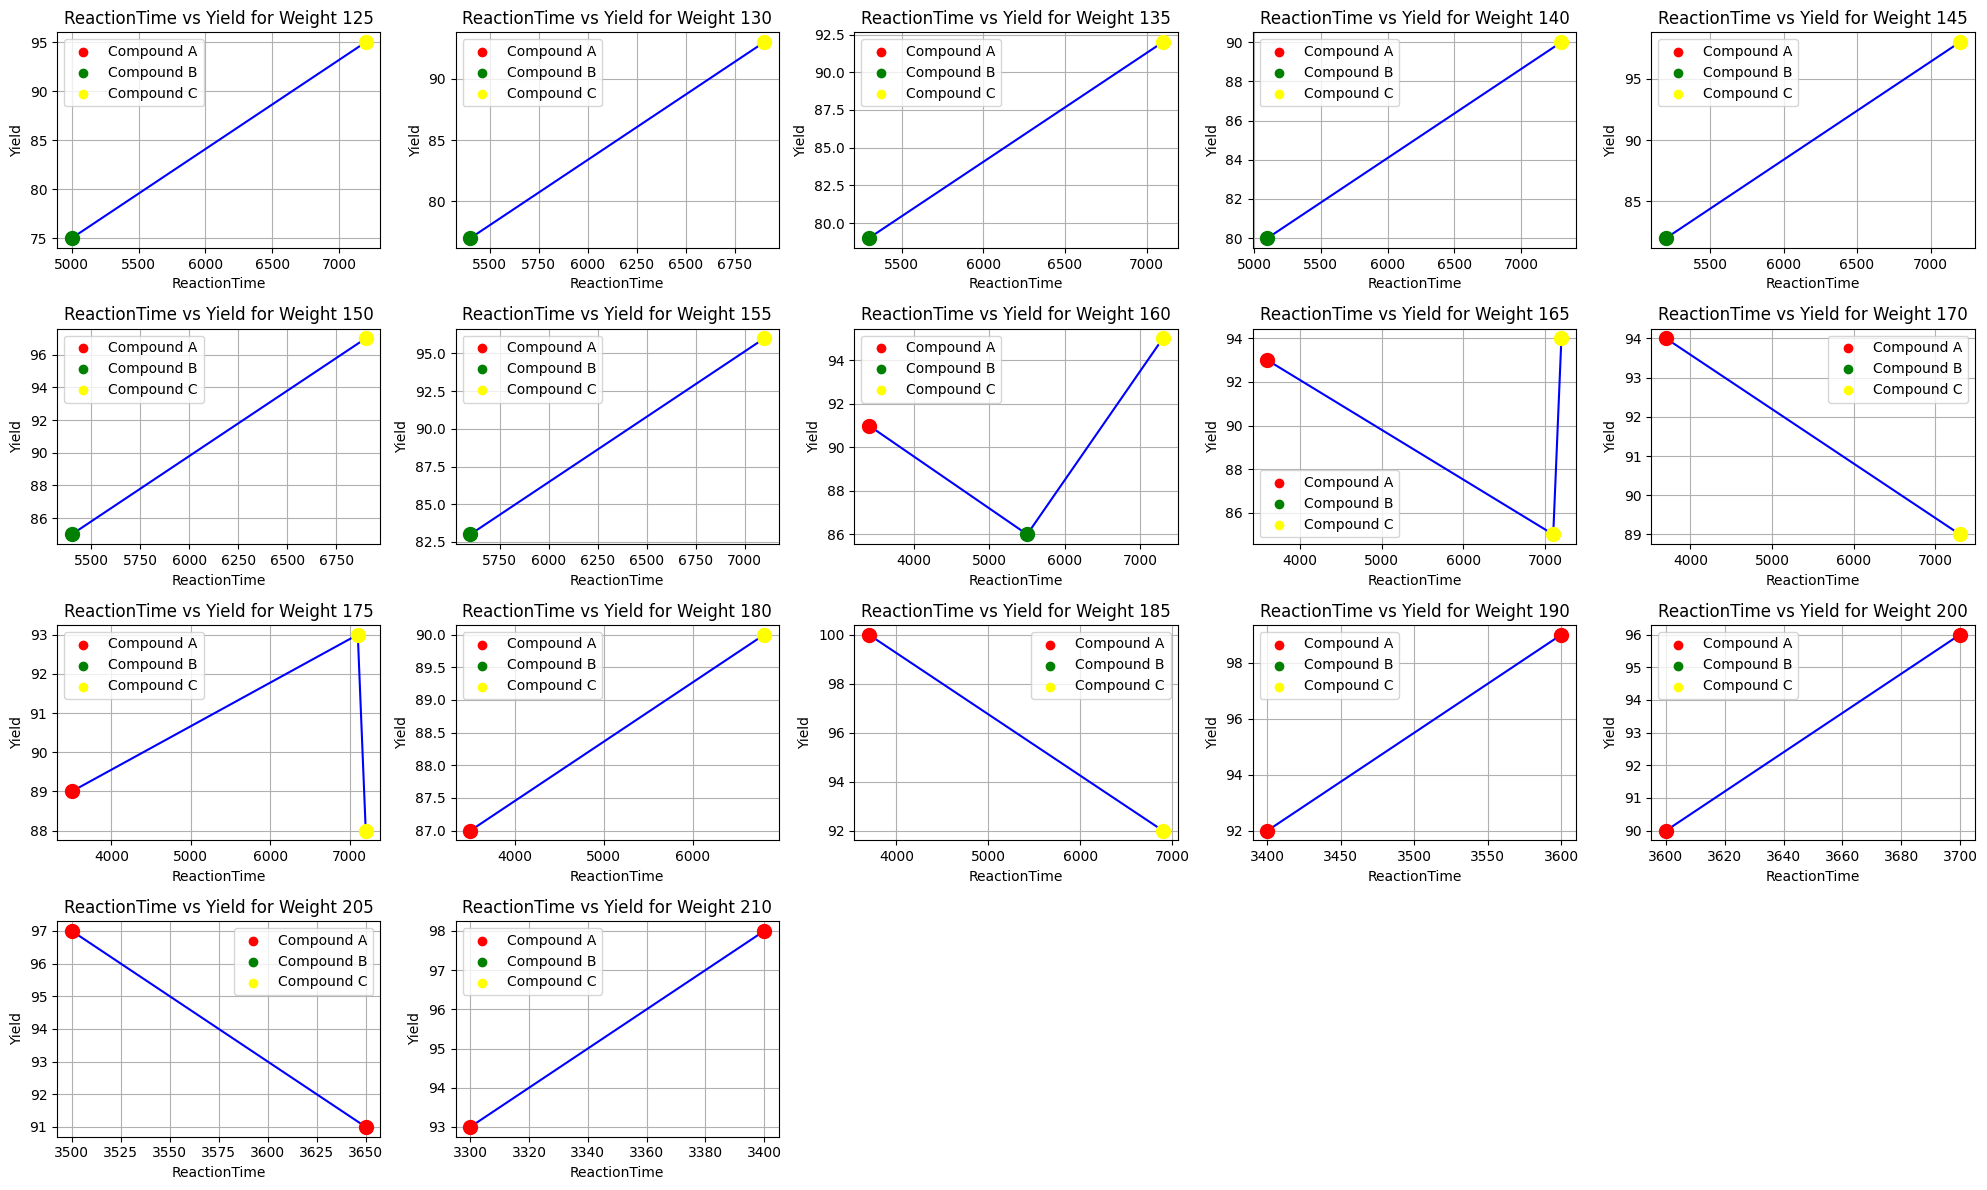

In [75]:
grouped=df_raw1.groupby("Weight")

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten()

color_map = {'Compound A': 'red', 'Compound B': 'green', 'Compound C': 'yellow'}

# Weight from 125 to 210
for i in range(len(duplicated_Weight)):
  weight=grouped.get_group(duplicated_Weight[i])
  colors = [color_map[product] for product in weight['SampleDesc']]
  axes[i].plot(weight['ReactionTime'], weight['Yield'],marker="o",linestyle="-", color="blue")
  for j in range(len(weight)):
    axes[i].scatter(weight['ReactionTime'].iloc[j], weight['Yield'].iloc[j], color=colors[j], s=100, zorder=5)
  axes[i].set_title('ReactionTime vs Yield for Weight '+str(duplicated_Weight[i]))
  axes[i].set_xlabel('ReactionTime')
  axes[i].set_ylabel('Yield')
  axes[i].grid(True)

  for product, color in color_map.items():
        axes[i].scatter([], [], color=color, label=f'{product}')
  axes[i].legend()

for j in range(len(duplicated_Weight), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In the above images, we can see the relationship respectively between yield and reaction time and weight. The following graph visualizes the two sets of relationships even better.

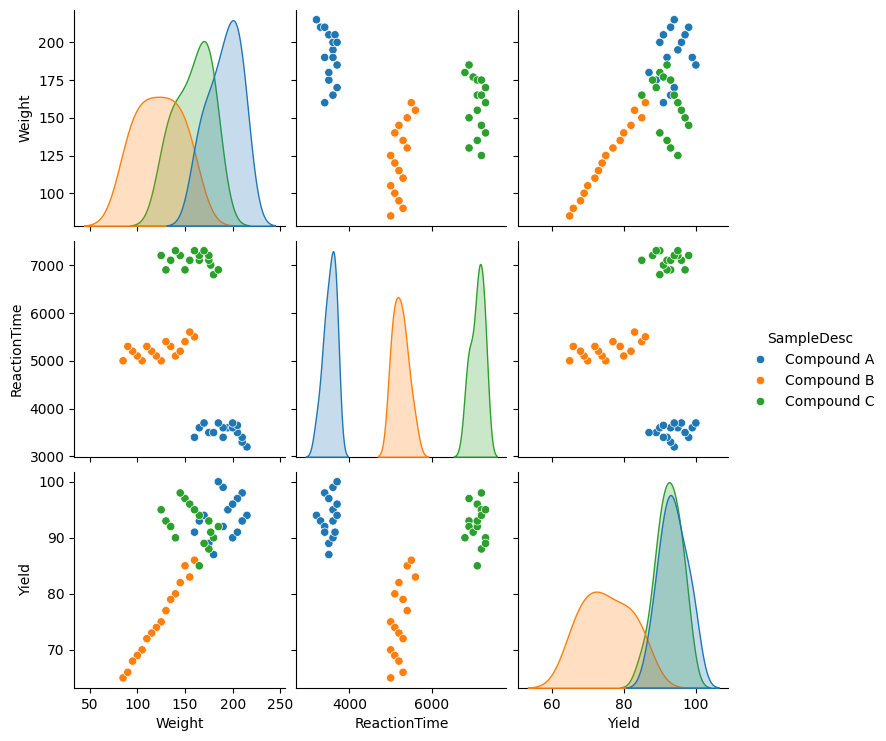

In [76]:
import seaborn as sns

sns.pairplot(df_raw1[['Weight', 'ReactionTime', 'Yield', 'SampleDesc']], hue='SampleDesc')
plt.show()
